<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/Final_project_ML_prediksi_harga_rumah_alsut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2440010334 - Nicholas

2440057672 - Joseph Adiel Ebenezer

2440045161 - Audia Maharani

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Import dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/UrDailyCs/datasetsQuizML/main/DataRumah%20-%20Sheet1.txt')
df.head()

,perumahan,cluster,luas tanah,luas bangunan,kamar tidur,kamar mandi,harga
0,Alam Sutera,Buana,128,138,5,4,3190000000
1,Alam Sutera,Buana,323,440,5,2,4900000000
2,Alam Sutera,Danau Biru,200,155,5,4,4020000000
3,Alam Sutera,Renata,350,400,5,3,8500000000
4,Golden Park 3 Serpong,Athena,50,31,2,1,966818300


In [ ]:
df.shape

(126, 7)

Seluruh harga dibagi 10000 saka supaya mudah

In [ ]:
df.harga=df['harga']/10000

In [ ]:
df.head()

,perumahan,cluster,luas tanah,luas bangunan,kamar tidur,kamar mandi,harga
0,Alam Sutera,Buana,128,138,5,4,319000.00
1,Alam Sutera,Buana,323,440,5,2,490000.00
2,Alam Sutera,Danau Biru,200,155,5,4,402000.00
3,Alam Sutera,Renata,350,400,5,3,850000.00
4,Golden Park 3 Serpong,Athena,50,31,2,1,96681.83


#Take a look into our data

In [ ]:
df.describe()

,luas tanah,luas bangunan,kamar tidur,kamar mandi,harga
count,126.000000,126.000000,126.000000,126.000000,1.260000e+02
mean,220.761905,256.626984,4.126984,3.365079,5.177501e+05
std,175.403098,218.241251,1.226273,1.394866,4.782888e+05
min,32.000000,30.000000,2.000000,1.000000,5.293726e+04
25%,90.000000,100.250000,3.000000,2.000000,1.724750e+05
50%,160.000000,192.500000,4.000000,3.000000,3.995000e+05
75%,339.500000,344.000000,5.000000,4.000000,6.837500e+05
max,1100.000000,1200.000000,7.000000,8.000000,2.800000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   perumahan      126 non-null    object 
 1   cluster        126 non-null    object 
 2   luas tanah     126 non-null    int64  
 3   luas bangunan  126 non-null    int64  
 4   kamar tidur    126 non-null    int64  
 5   kamar mandi    126 non-null    int64  
 6   harga          126 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 7.0+ KB


In [ ]:
print('banyak perumahan yang kita ambil adalah ',len(df['perumahan'].value_counts()))
print("\n\ndan berikut banyak dari tiap perumahan\n")
df['perumahan'].value_counts()

banyak perumahan yang kita ambil adalah  9


dan berikut banyak dari tiap perumahan



Alam Sutera              61
Green Lake               21
BSD City                 11
Jade Park Serpong         8
Lavon                     8
Golden Park 3 Serpong     7
Suvarna Sutera            4
Nava Park                 3
Paradise Serpong          3
Name: perumahan, dtype: int64

In [ ]:
df['cluster'].value_counts()

Palma            9
Athena           7
Narada           7
Buana            6
Cemara           6
Eropa            6
Onyx             6
Asri             6
The Savia        5
Amerika Latin    4
Renata           4
Dakota           4
 Regalia         4
Asia             3
Winona           3
East Asia        3
Amerika          3
 Lyndon          3
Orlanda          3
Leora            3
Park Home        2
Australia        2
Victoria         2
Askara           1
Tiara            1
Azura            1
Anila            1
Anarta           1
Alesha           1
 Carara          1
 Summerland      1
Diamond          1
Assana           1
Onix             1
Tyria            1
Zirkon           1
Pelangi          1
Danau Biru       1
Olivia           1
Sapphire         1
Ruby             1
De Mansion       1
Emerald          1
 Park Home       1
Citrine          1
Opal             1
Topaz            1
 Grand Canyon    1
Name: cluster, dtype: int64

In [ ]:
mask = df.cluster.map(df.cluster.value_counts())==1
df.loc[mask, "cluster"]= "other"

In [ ]:
df['cluster'].value_counts()

other            25
Palma             9
Narada            7
Athena            7
Cemara            6
Eropa             6
Onyx              6
Buana             6
Asri              6
The Savia         5
 Regalia          4
Dakota            4
Amerika Latin     4
Renata            4
Asia              3
Amerika           3
East Asia         3
Winona            3
Orlanda           3
 Lyndon           3
Leora             3
Park Home         2
Australia         2
Victoria          2
Name: cluster, dtype: int64

##Removing outliers

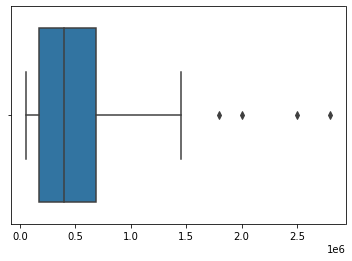

In [ ]:
_=sns.boxplot(x = df.iloc[:, -1].values, data=df)

In [ ]:
max= df.harga.quantile(0.95)
max

1360000.0

In [ ]:
df[df.harga > max].shape

(7, 7)

In [ ]:
df=df[ (df.harga < max)]

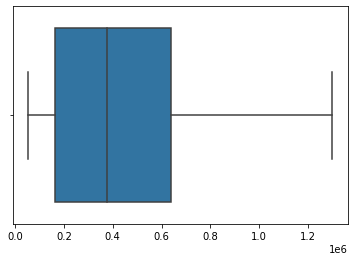

In [ ]:
_=sns.boxplot(x = df.iloc[:, -1].values, data=df)

In [ ]:
df.shape

(119, 7)

##Grafik

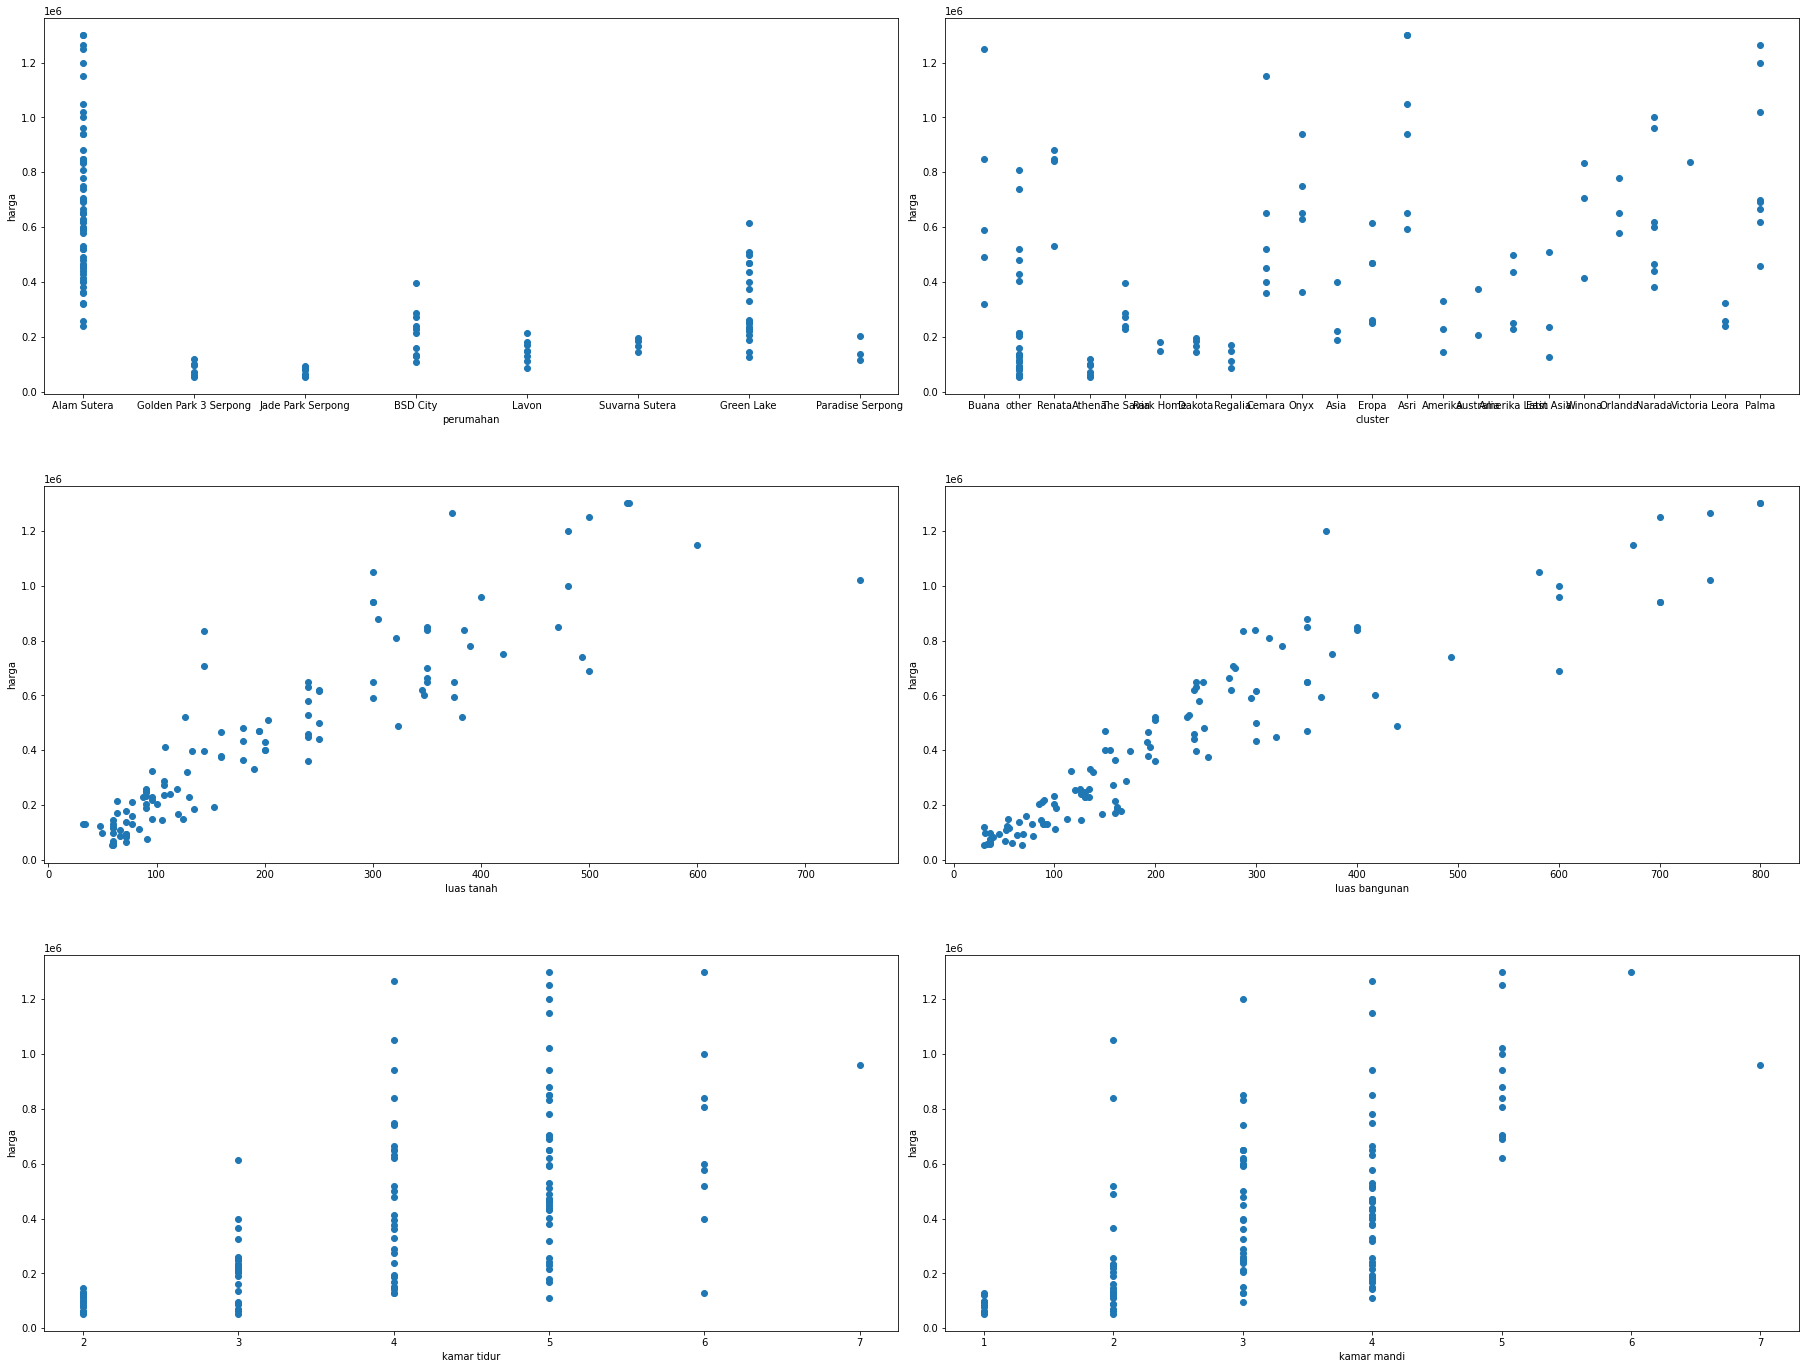

In [ ]:
plt.figure(figsize=(25,25))
for i in range(df.shape[1]-1):
  plt.subplot(4,2,i+1)
  plt.scatter(x = df.iloc[:, i].values, y=df.iloc[:,-1].values, label=df.columns[i])
  plt.xlabel(df.columns[i])
  plt.ylabel(df.columns[-1])
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

dilihat persebaran banyak kamar tidur, dan kamar mandi terhadap luas tanah

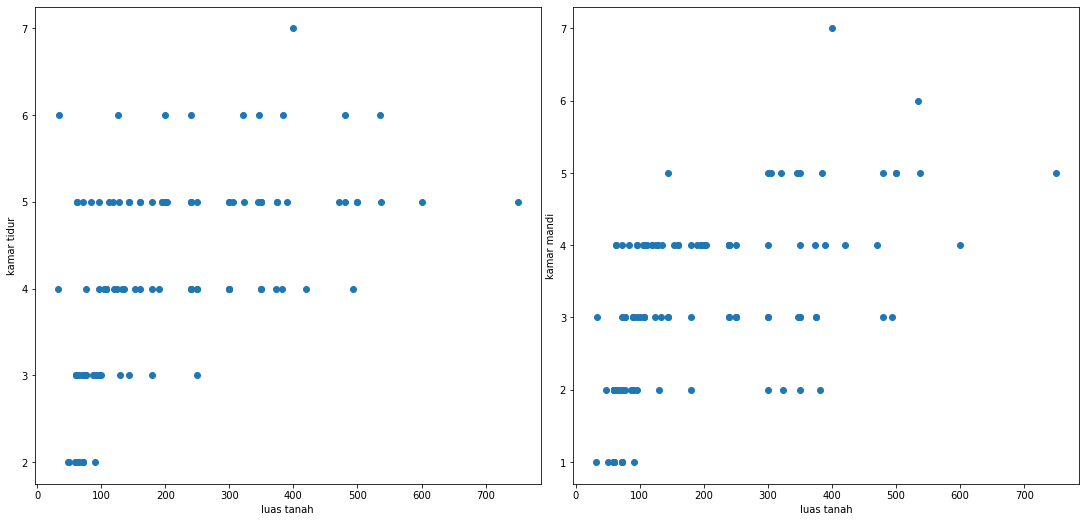

In [ ]:
plt.figure(figsize=(15,30))
for i in range(df.shape[1]-1):
  if(df.columns[i]!='kamar mandi' and df.columns[i]!='kamar tidur'): continue
  plt.subplot(4,2,i+1)
  plt.scatter(y = df.iloc[:, i].values, x=df['luas tanah'].values, label=df.columns[i])
  plt.ylabel(df.columns[i])
  plt.xlabel("luas tanah")
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# plt.scatter(x = df['kamar mandi'].values, y=df['kamar tidur'].values)

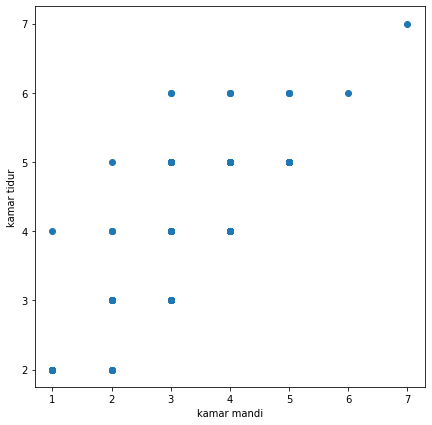

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel("kamar mandi")
plt.ylabel("kamar tidur")
plt.scatter(x = df['kamar mandi'].values, y=df['kamar tidur'].values)

plt.show()

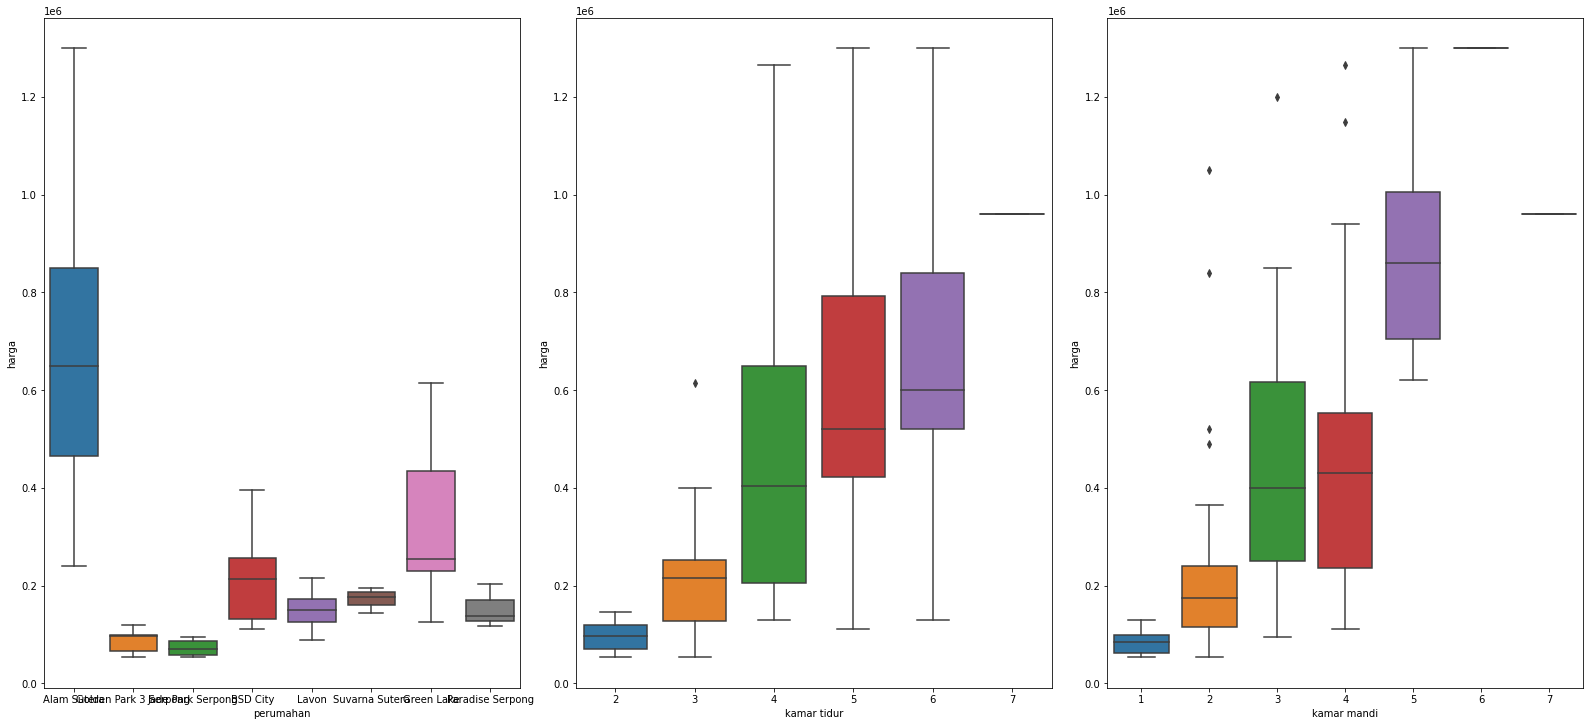

In [ ]:
plt.figure(figsize=(22,10))
a=0
for i in range(df.shape[1]-1):
  if(df.columns[i]=='luas tanah' or df.columns[i]=='luas bangunan' or df.columns[i]=='cluster'): continue
  plt.subplot(1,3,a+1)
  a+=1
  sns.boxplot(x = df.iloc[:, i].values, y=df.iloc[:,-1].values, data=df)
  plt.xlabel(df.columns[i])
  plt.ylabel(df.columns[-1])
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

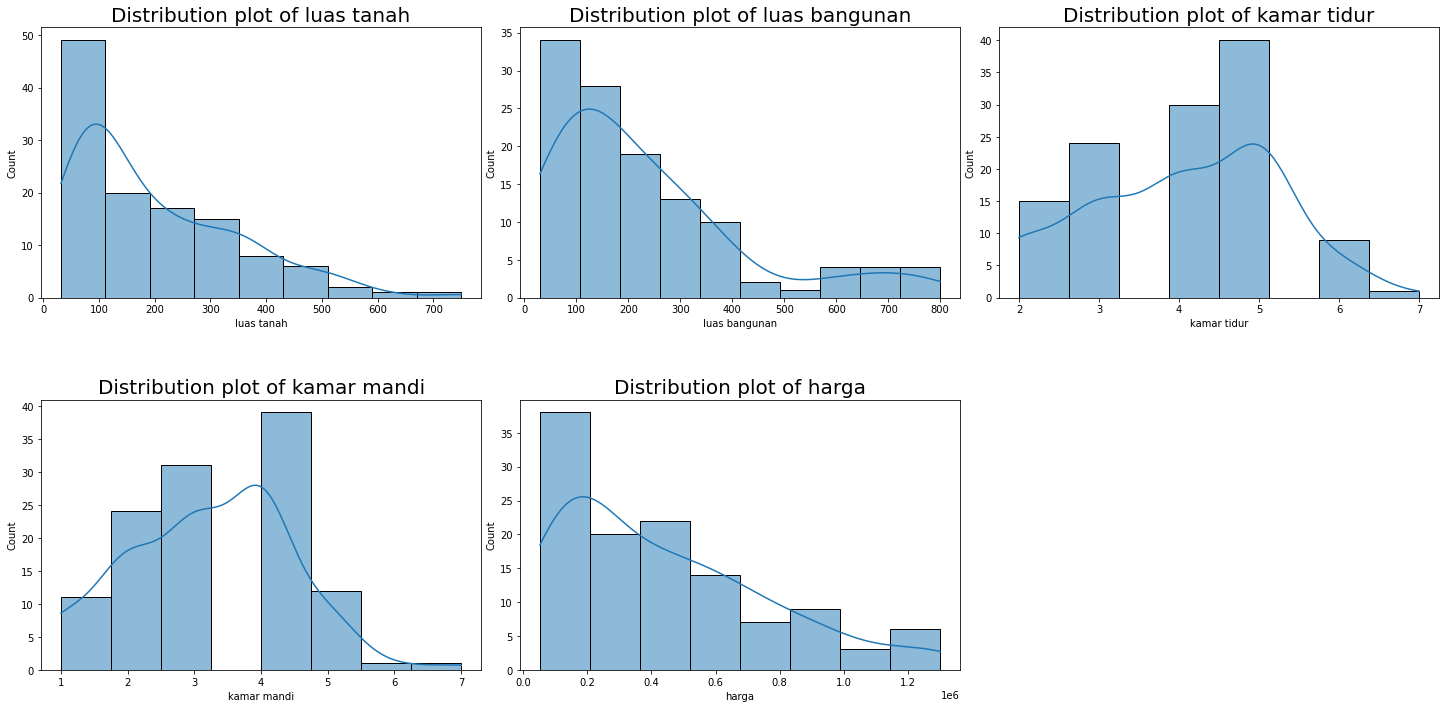

In [ ]:
plt.figure(figsize=(20, 30))
a=0
for i, col in zip(range(1, len(df.columns)+1), df.columns):
  if(col=="perumahan" or col=="cluster"): continue
  plt.subplot(6, 3, a+1)
  a+=1
  sns.histplot(x=col, data=df, kde=True)
  plt.title(f'Distribution plot of {col}', fontsize=20)
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

#Check features with correlation

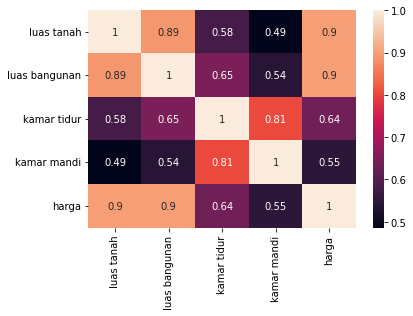

In [ ]:
_= sns.heatmap(df.corr(), annot=True)

In [ ]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))**.5

In [ ]:
for i in range(len(df.columns)-2):
  print(f"Korelasi antar perumahan dengan {df.columns[i+2]} adalah {correlation_ratio(df.perumahan, df[df.columns[i+2]])}")
  print(f"Korelasi antar cluster dengan {df.columns[i+2]} adalah {correlation_ratio(df.cluster, df[df.columns[i+2]])}")
  print()

Korelasi antar perumahan dengan luas tanah adalah 0.7405643335918465
Korelasi antar cluster dengan luas tanah adalah 0.8082772584773066

Korelasi antar perumahan dengan luas bangunan adalah 0.6734691189387192
Korelasi antar cluster dengan luas bangunan adalah 0.7633852525473711

Korelasi antar perumahan dengan kamar tidur adalah 0.7518053286692112
Korelasi antar cluster dengan kamar tidur adalah 0.6916234308682313

Korelasi antar perumahan dengan kamar mandi adalah 0.7021117403144135
Korelasi antar cluster dengan kamar mandi adalah 0.6599232566467199

Korelasi antar perumahan dengan harga adalah 0.7845928534065245
Korelasi antar cluster dengan harga adalah 0.8135638194224369



Disini tidak akan di drop features karena ada korelasi yang cukup tinggi

#Assign X dan y

In [ ]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values


In [ ]:
X[:5]

array([['Alam Sutera', 'Buana', 128, 138, 5, 4],
       ['Alam Sutera', 'Buana', 323, 440, 5, 2],
       ['Alam Sutera', 'other', 200, 155, 5, 4],
       ['Alam Sutera', 'Renata', 350, 400, 5, 3],
       ['Golden Park 3 Serpong', 'Athena', 50, 31, 2, 1]], dtype=object)

In [ ]:
len(X[0])

6

In [ ]:
y[:5]

array([319000.  , 490000.  , 402000.  , 850000.  ,  96681.83])

#One Hot Encoding for categorical variables

In [ ]:
#Encode first column (perumahan)
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
len(X[0])

13

In [ ]:
X[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'Buana', 128, 138, 5, 4],
      dtype=object)

In [ ]:
#Encode second column (cluster)
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
len(X[0])

35

In [ ]:
X[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 128, 138, 5, 4], dtype=object)

#Split Training and testing

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)

print(X_test.shape)

(95, 35)
(24, 35)


In [ ]:
X_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 350, 350, 5, 3], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8911516638057638

#Standarization

In [ ]:
sc = StandardScaler()
X_train[:, 31:] = sc.fit_transform(X_train[:, 31:])
X_test[:, 31:] = sc.transform(X_test[:, 31:])

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8911516638057554

In [ ]:
X_train

array([[0.0, 0.0, 0.0, ..., 0.7445262870079877, 0.8855823415240062,
        -0.09479940983242012],
       [0.0, 0.0, 0.0, ..., -0.8804744506859593, -0.831363014491924,
        -0.9135215856578672],
       [0.0, 0.0, 0.0, ..., -1.0333490845456685, -1.689835692499889,
        -1.7322437614833144],
       ...,
       [0.0, 0.0, 0.0, ..., -0.14441139876884046, 0.8855823415240062,
        0.723922765993027],
       [0.0, 0.0, 0.0, ..., -0.150073422245126, 0.8855823415240062,
        0.723922765993027],
       [0.0, 0.0, 0.0, ..., 2.0467916865536595, 0.027109663516041087,
        -0.9135215856578672]], dtype=object)

#Coba dengan PCA

In [ ]:
pca=PCA(0.95)

In [ ]:
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
X_train_pca,X_test_pca, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_pca= pca.transform(X_train)
X_test_pca= pca.transform(X_test)

In [ ]:
len(X_test_pca[0])

17

In [ ]:
pca.explained_variance_ratio_.sum()

0.9543996076914185

In [ ]:
X_train_pca[0]

array([ 1.47728265,  0.66006703,  0.50553487, -0.63041257, -0.04906952,
       -0.07997705,  0.12003868,  0.03500897,  0.00224056,  0.28389999,
        0.59078878, -0.18845883,  0.29723033,  0.05572848, -0.24952477,
       -0.1274135 , -0.09815038])

In [ ]:
lr= LinearRegression()
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

0.887188550839486

In [ ]:
all_loss = []

for alpha in [0.01, 0.1, 0.2]:
  model = gradient_descent(X_train_pca.shape[1])
  epochs = 12500
  loss = model.fit(X_train_pca, y_train, epochs, alpha)

  all_loss.append([alpha, loss])

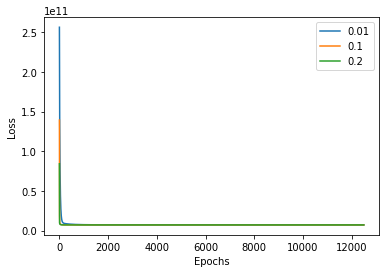

In [ ]:
# View semua proses penurunan loss untuk alpha yang berbeda
for i in range(len(all_loss)):
  # plt.axis([0, 25, 0, 100])
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])
  # plt.axis([0, 25, 0, 1.0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = gradient_descent(X_train_pca.shape[1])
epochs = 2000
_=model.fit(X_train_pca, y_train, epochs,0.2)

In [ ]:
w = model.theta
b = model.intercept
def final_predict(X):
  return b + np.dot(X, w)

In [ ]:
y_pred = final_predict(X_test_pca)

In [ ]:
r2_score(y_test,y_pred)

0.8871885508395306

#Linear Regression GD

In [ ]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.get_MSE(y, y_pred))

    return loss

In [ ]:
all_loss = []

for alpha in [0.1, 0.2, 0.3]:
  model = gradient_descent(X_train.shape[1])
  epochs = 250
  loss = model.fit(X_train, y_train, epochs, alpha)

  all_loss.append([alpha, loss])

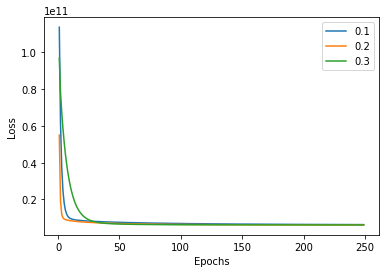

In [ ]:

for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = gradient_descent(X.shape[1])
epochs = 100
_=model.fit(X_train, y_train, epochs,0.2)

In [ ]:
X_train.shape

(95, 35)

In [ ]:
w = model.theta
b = model.intercept
def final_predict(X):
  return b + np.dot(X, w)

In [ ]:
y_pred_train= final_predict(X_train)

In [ ]:
y_pred = final_predict(X_test)

In [ ]:
r2_score(y_train,y_pred_train)

0.9355056841946806

In [ ]:
r2_score(y_test,y_pred)

0.8968792218142028

MEAN SQUARED ERROR and ROOT MEAN SQUARED ERROR

In [ ]:
print('MSE is',mean_squared_error(y_test, y_pred))
print('RMSE is',math.sqrt(mean_squared_error(y_test, y_pred)))

MSE is 12008003532.660439
RMSE is 109581.0363733636


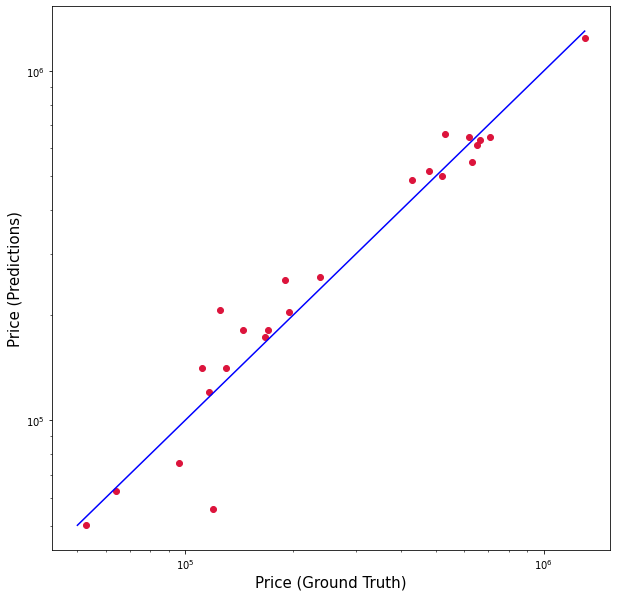

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = np.max([np.max(y_test), np.max(y_pred)]) 
p2 = np.min([np.min(y_test), np.min(y_pred)])

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Price (Ground Truth)', fontsize=15)
plt.ylabel('Price (Predictions)', fontsize=15)
plt.show()

#Kesimpulan dari penggunaan PCA
Sehingga kami menyimpulkan bahwa penggunaan dengan PCA sangat bagus. dimana data awal memiliki 35 fitur, dengan PCA direduksi menjadi 17 fitur dan masih mempertahankan 95% informasi yang ada. ketika dicoba untuk regresi pun, didapatkan hasil yang mirip yaitu 88.7%